# Project Genre-ID


### Problem Statement:

   Using neural networks, I will be attempting to recreate a deep-learning model similar to what the Shazam application does...only, instead of identifying a particular song or artist and matching it's 'fingerprint' to a database, I'm going to build a database, and from that database, build a neural network that will learn how to classify a song into a given genre. 

### Solution: 

  First, we will need to build a database. I already have a catalog of music large enough for this project (I'm only going to use 500 songs). I'd like to start with 15 different genres, 10 songs each, for a total of 150 songs, in order to do some basic EDA. The songs I have are in mp3 format, so, I will have to convert all these files to WAV files in order to work with them using the librosa library, a python package for audio analysis. WAV files are uncompressed and are much larger than compressed mp3 files. So, even though 500 songs doesn't seem like much, when converted to WAV format, our database ends up being around 25G worth of data. 
  
   Next, I will make a spectrogram and waveplots using one song from each genre and compare them visually. From these visual comparisons, I will narrow our genres down to 5, loading 100 songs into each genre, for a total of 500 songs.               
   
  In order to produce enough data for a neural network to learn, I'm going to segment each song into 10 second  snippets. This will give us around 12k different WAV files to build our model. 
          
   Since my laptop is a dinosaur, and .wav files are very large, I'm going to have hardware issues for sure. So, I'm going to use Amazon Web Services' to load my data into, and run my neural network. I will use a basic neural network to model our data.
    

### Risks and Assumptions:
 
   For this model to be accurate, we're assuming that the songs (along with their snippets) accurately portray an entire genre. This may not be realistic, and, is in fact subjective. I think, that for any deep learning model for us to train, more data is usually always necessary to improve your accuracy. However, due to time constrictions, I'm hoping that anywhere over 60% accuracy would be a good benchmark.
   
   I think genres that are somewhat similar are going to be difficult for the model to distinguish. So, we will eventually train our model from 12k, 10 second snippets. However, again, due to time constraints, many of these snippets are taken from the same song. A more accurate approach would have been to ultimately choose the 10 second snippets from different songs....On the other hand, because many of the snippets are taken from the same song, this may actually overfit our model and falsely improve our accuracy. It will interesting to find out what our results are! 



### References:
 1. ThinkDSP, Version 0.9.9, Allen B. Downey
 2. http://gizmodo.com/5647458/how-shazam-works-to-identify-nearly-every-song-you-throw-at-it
 3. http://www.frank-zalkow.de/en/code-snippets.html

In [2]:
from os import chdir 
chdir('./code')

In [3]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
%reload_ext sql

In [14]:
%sql postgresql://localhost:5432/ddqing

OperationalError: (psycopg2.OperationalError) fe_sendauth: no password supplied


### Connect to local psql database:

In [12]:
engine = create_engine('postgresql://localhost:5432/GinoDeFalco')

### Load .wav files

In [16]:
African_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/African Woman.wav')
African_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Fela Cuti.wav')
African_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Ken Moussoul Guis Li.wav')
African_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Kings Of African Music.wav')        
African_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Ndiabaane.wav')
African_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sabador la Bamba.wav')
African_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sama Rew.wav')
African_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sama Thiel.wav')
African_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Tierra Tradicional.wav')
African_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Xale Bile.wav')


### Send wav file into local psql as a table

In [ ]:
African_1.to_sql(name='African_1', con=engine, if_exists = 'append', index=False)

### Let's start loading in our data. 

  I've already created 10 second snippets from each song using the audio engineering software, Logic Pro. I'm going to import a couple from each genre in order to do some EDA on them. I originally created the snippets using 24bit-depth, however, only 16 or 32 bit-depth is supported in library. I also used a 44100 sampling rate (frame-rate).

  I'm going to normalize the snippets. Normalizing the snippets will scale the wave so the range of the amplitude will be between -1 and 1.


### African

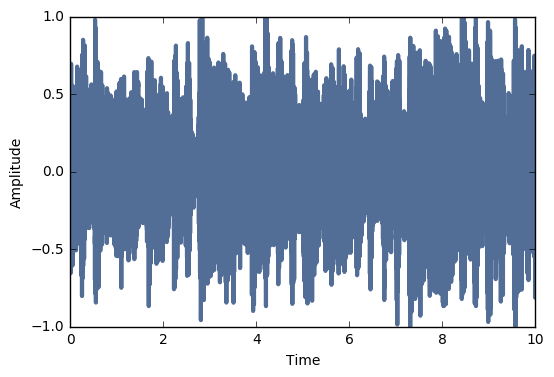

In [21]:
African_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/African Woman.wav')
African_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
African_1.plot()

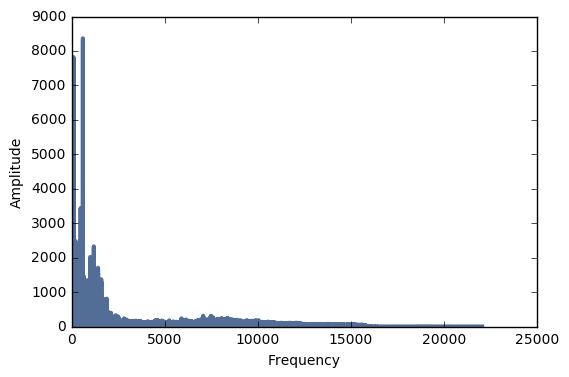

In [20]:
African_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Fela Cuti.wav')
African_2.normalize()
African_2_spectrum = African_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
African_2_spectrum.plot()

In [ ]:
African_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Ken Moussoul Guis Li.wav')
African_3 = African_3.normalize()
African_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Kings Of African Music.wav')
African_4 = African_4.normalize()
African_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Ndiabaane.wav')
African_5 = African_5.normalize()
African_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sabador la Bamba.wav')
African_6 = African_6.normalize()
African_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sama Rew.wav')
African_7 = African_7.normalize()
African_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Sama Thiel.wav')
African_8 = African_8.normalize()
African_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Tierra Tradicional.wav')
African_9 = African_9.normalize()
African_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/African/Xale Bile.wav')
African_10 = African_10.normalize()

### Blues

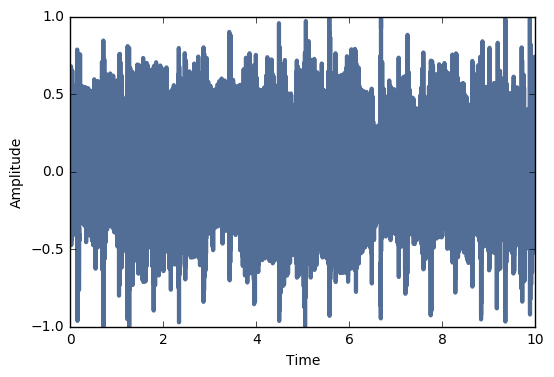

In [22]:
Blues_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Born With A Broken Heart.wav')
Blues_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Blues_1.plot()

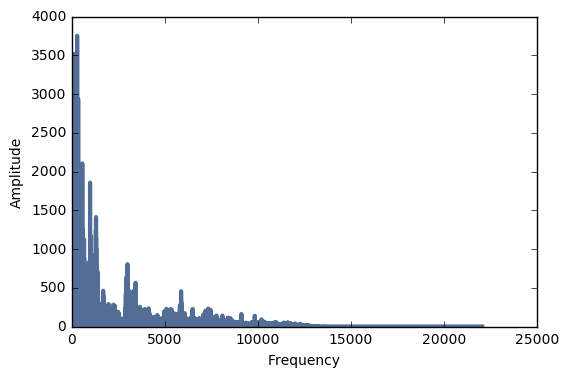

In [4]:
Blues_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Dirty Pool.wav')
Blues_2.normalize()
Blues_2_spectrum = Blues_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Blues_2_spectrum.plot()

In [ ]:
Blues_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Lay Down Sally.wav')
Blues_3 = Blues_3.normalize()
Blues_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Lie to Me.wav')
Blues_4 = Blues_4.normalize()
Blues_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Little Wing.wav')
Blues_5 = Blues_5.normalize()
Blues_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Lucille.wav')
Blues_6 = Blues_6.normalize()
Blues_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Mary Had A Little Lamb.wav')
Blues_7 = Blues_7.normalize()
Blues_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Rock Me Baby.wav')
Blues_8 = Blues_8.normalize()
Blues_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Shame Shame.wav')
Blues_9 = Blues_9.normalize()
Blues_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Blues/Texas Flood.wav')
Blues_10 = Blues_10.normalize()

### Classical

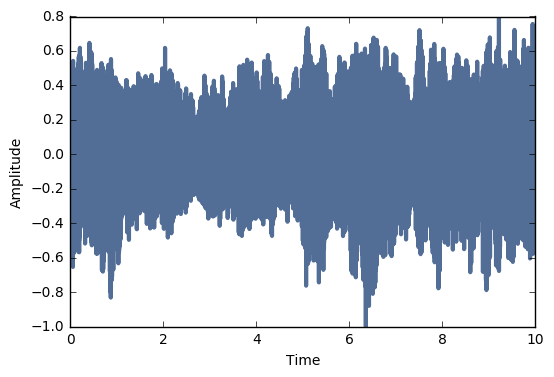

In [23]:
Classical_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Brandenburg Concerto 2 Fmaj-Andante.wav')
Classical_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Classical_1.plot()

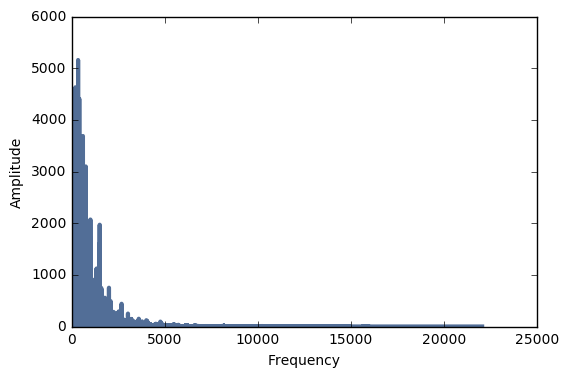

In [6]:
Classical_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Brandenburg No.2, in F_ Allegro Assai.wav')
Classical_2.normalize()
Classical_2_spectrum = Classical_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Classical_2_spectrum.plot()

In [ ]:
Classical_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Così fan tutte, K. 588_ _Soave sia il vento_.wav')
Classical_3 = Classical_3.normalize()
Classical_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Flight of the Bumblebee.wav')
Classical_4 = Classical_4.normalize()
Classical_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Gianni Schicchi_ _O mio babbino caro_.wav')
Classical_5 = Classical_5.normalize()
Classical_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Mozart_ Overature, Marriage of Figaro.wav')
Classical_6 = Classical_6.normalize()
Classical_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Pachebal Canon Dm.wav')
Classical_7 = Classical_7.normalize()
Classical_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Bach Suite No 1.wav')
Classical_8 = Classical_8.normalize()
Classical_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Track 2.wav')
Classical_9 = Classical_9.normalize()
Classical_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Classical/Track 3.wav')
Classical_10 = Classical_10.normalize()

### Country

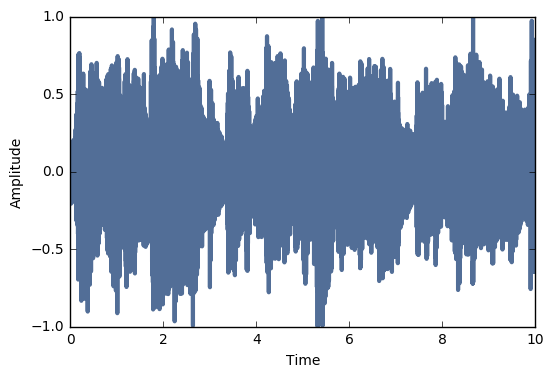

In [30]:
Country_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/A Home.wav')
Country_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Country_1.plot()

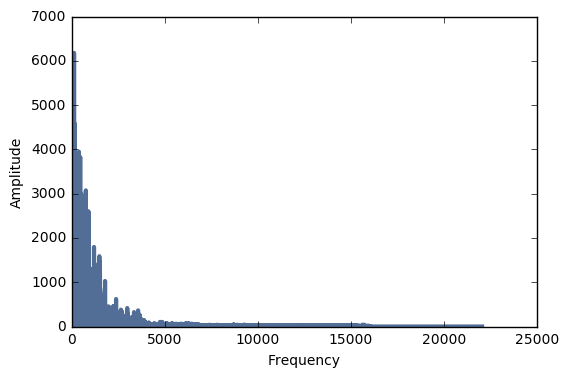

In [8]:
Country_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Annies Song.wav')
Country_2.normalize()
Country_2_spectrum = Country_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Country_2_spectrum.plot()

In [ ]:
Country_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Coward Of The County.wav')
Country_3 = Country_3.normalize()
Country_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Islands In The Stream.wav')
Country_4 = Country_4.normalize()
Country_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Marry Me.wav')
Country_5 = Country_5.normalize()
Country_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Mr. Bojangles.wav')
Country_6 = Country_6.normalize()
Country_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/Rocky Mountain High.wav')
Country_7 = Country_7.normalize()
Country_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/The Gambler.wav')
Country_8 = Country_8.normalize()
Country_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/The Way You Love Me.wav')
Country_9 = Country_9.normalize()
Country_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Country/This Kiss.wav')
Country_10 = Country_10.normalize()


### Electronic genre

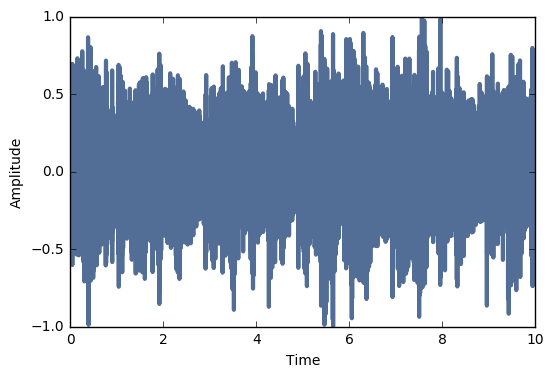

In [31]:
Electronic_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Brazilian Trance.wav')
Electronic_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Electronic_1.plot()

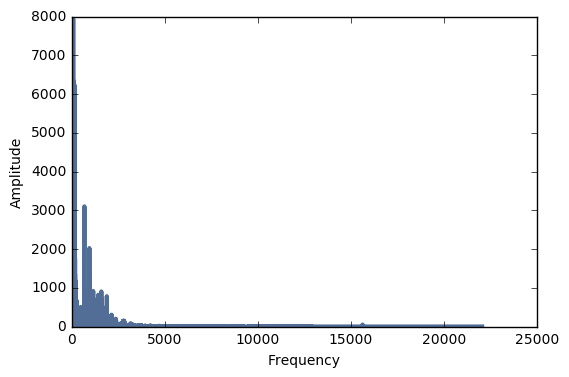

In [9]:
Electronic_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Close Encounters.wav')
Electronic_2.normalize()
Electronic_2_spectrum = Electronic_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Electronic_2_spectrum.plot()

In [ ]:
Electronic_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Dance Music Trance.wav')
Electronic_3.normalize()
Electronic_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/DMT Dance Music Trance.wav')
Electronic_4.normalize()
Electronic_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Dream Of Trance.wav')
Electronic_5.normalize()
Electronic_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Feels So Good Ft. Nadia Ali.wav')
Electronic_6.normalize()
Electronic_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Loft Music.wav')
Electronic_7.normalize()
Electronic_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Hard House Rave Mix.wav')
Electronic_8.normalize()
Electronic_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/Hard Trance.wav')
Electronic_9.normalize()
Electronic_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Electronic/House Mix.wav')
Electronic_10.normalize()

### Folk genre

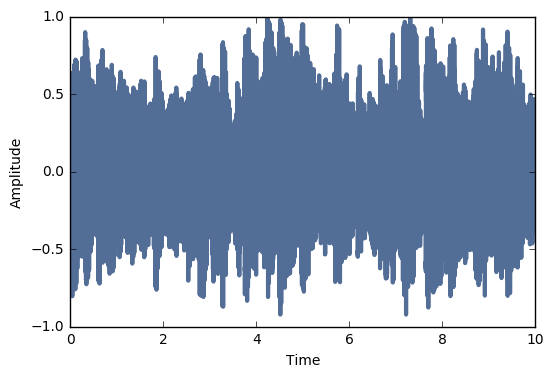

In [32]:
Folk_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/A Fond Farwell.wav')
Folk_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Folk_1.plot()

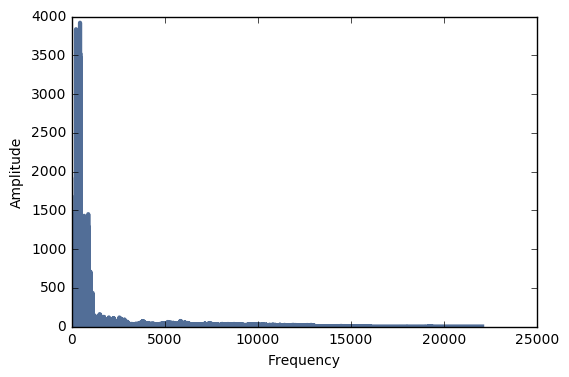

In [10]:
Folk_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Blowin In The Wind.wav')
Folk_2.normalize()
Folk_2_spectrum = Folk_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Folk_2_spectrum.plot()

In [ ]:
Folk_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Coast To Coast.wav')
Folk_3 = Folk_3.normalize()
Folk_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Dont Go Down.wav')
Folk_4 = Folk_4.normalize()
Folk_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/In The Aeroplane Over The Sea.wav')
Folk_5 = Folk_5.normalize()
Folk_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/King Of Carrot Flowers.wav')
Folk_6 = Folk_6.normalize()
Folk_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Lets Get Lost.wav')
Folk_7 = Folk_7.normalize()
Folk_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Memory Lane.wav')
Folk_8 = Folk_8.normalize()
Folk_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Naked As We Came.wav')
Folk_9 = Folk_9.normalize()
Folk_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Folk/Strung Out Again.wav')
Folk_10 = Folk_10.normalize()

### Funk

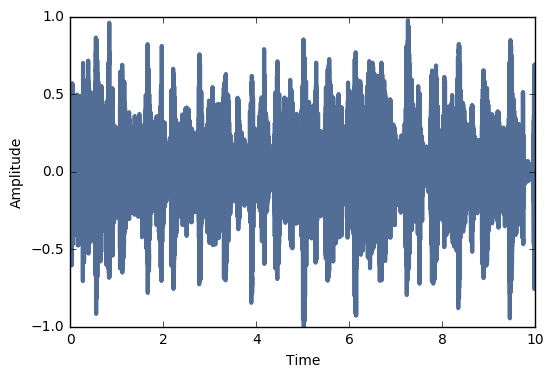

In [33]:
Funk_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Atomic Dog.wav')
Funk_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Funk_1.plot()

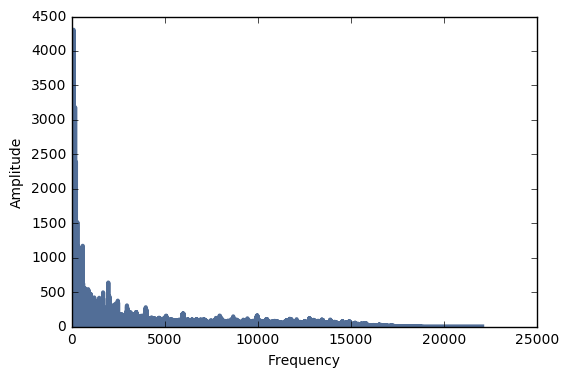

In [11]:
Funk_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Bring On The Funk.wav')
Funk_2.normalize()
Funk_2_spectrum = Funk_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Funk_2_spectrum.plot()


In [ ]:
Funk_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Count Funkula.wav')
Funk_3 = Funk_3.normalize()
Funk_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Get Funked Up.wav')
Funk_4 = Funk_4.normalize()
Funk_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Little L.wav')
Funk_5 = Funk_5.normalize()
Funk_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/One Nation Under A Groove.wav')
Funk_6 = Funk_6.normalize()
Funk_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Pusherman.wav')
Funk_7 = Funk_7.normalize()
Funk_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/September.wav')
Funk_8 = Funk_8.normalize()
Funk_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Supergroovalisticprosifunkstication.wav')
Funk_9 = Funk_9.normalize()
Funk_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Funk/Virtual Insanity.wav')
Funk_10 = Funk_10.normalize()

### Jazz

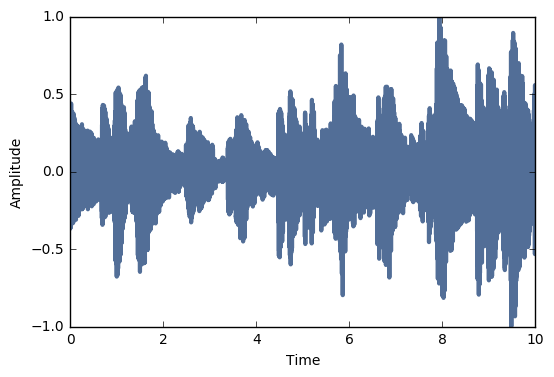

In [34]:
Jazz_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Blue In Green.wav')
Jazz_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Jazz_1.plot()

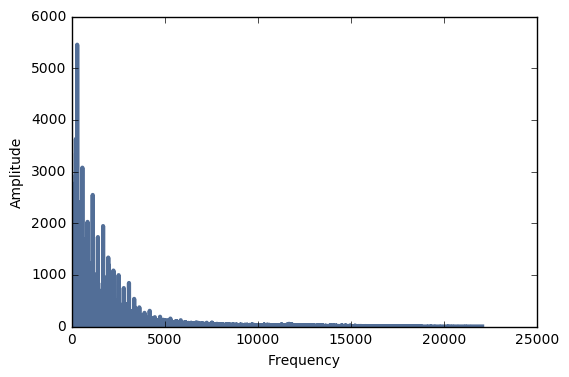

In [12]:
Jazz_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Chameleon.wav')
Jazz_2.normalize()
Jazz_2_spectrum = Jazz_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Jazz_2_spectrum.plot()

In [ ]:
Jazz_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Come Fly With Me.wav')
Jazz_3 = Jazz_3.normalize()
Jazz_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Kind Of Blue.wav')
Jazz_4 = Jazz_4.normalize()
Jazz_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Blue Train.wav')
Jazz_5 = Jazz_5.normalize()
Jazz_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/In A Mellow Tone.wav')
Jazz_6 = Jazz_6.normalize()
Jazz_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Kind Of Blue.wav')
Jazz_7 = Jazz_7.normalize()
Jazz_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/So What.wav')
Jazz_8 = Jazz_8.normalize()
Jazz_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/Stardust.wav')
Jazz_9 = Jazz_9.normalize()
Jazz_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Jazz/The Girl From Ipanema.wav')
Jazz_10 = Jazz_10.normalize()

### Latin

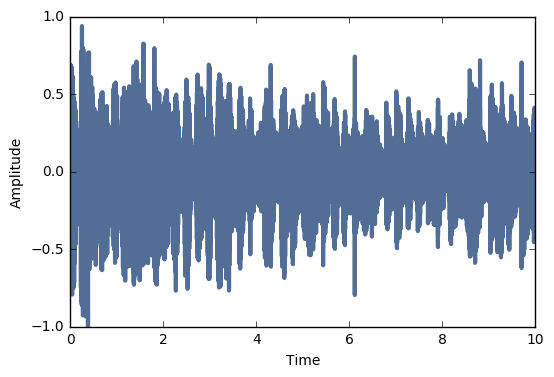

In [35]:
Latin_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Amor Verdadero.wav')
Latin_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Latin_1.plot()

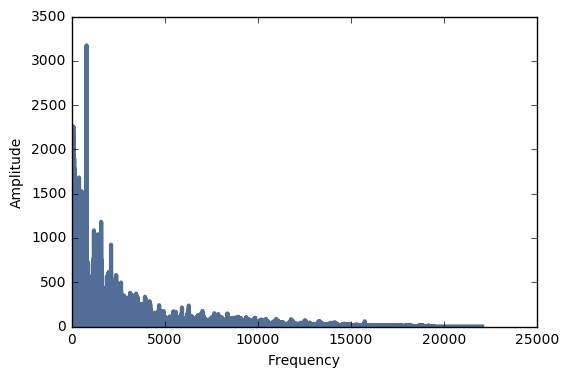

In [13]:
Latin_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Clasiqueando Con Ruben.wav')
Latin_2.normalize()
Latin_2_spectrum = Latin_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Latin_2_spectrum.plot()

In [ ]:
Latin_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/El Perdedor.wav')
Latine_3 = Latin_3.normalize()
Latin_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Eliminacion De Los Feos.wav')
Latin_4 = Latin_4.normalize()
Latin_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Fiesta De La Rumba.wav')
Latin_5 = Latin_5.normalize()
Latin_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Habana Del Este.wav')
Latine_6 = Latin_6.normalize()
Latin_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/La Boda.wav')
Latin_7 = Latin_7.normalize()
Latin_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Mucho Corazon.wav')
Latin_8 = Latin_8.normalize()
Latin_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Obsession.wav')
Latin_9 = Latin_9.normalize()
Latin_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Latin/Oye Mi Guaguancó.wav')
Latin_10 = Latin_10.normalize()

### Metal

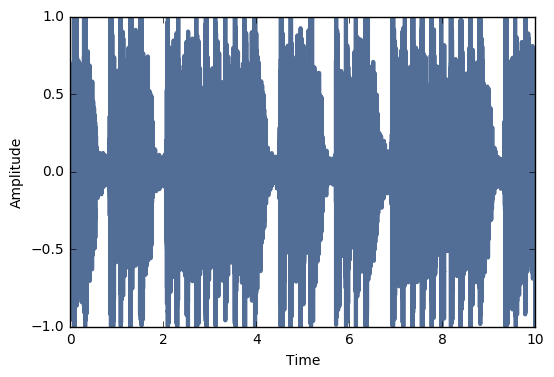

In [36]:
Metal_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Am I Evil.wav')
Metal_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Metal_1.plot()

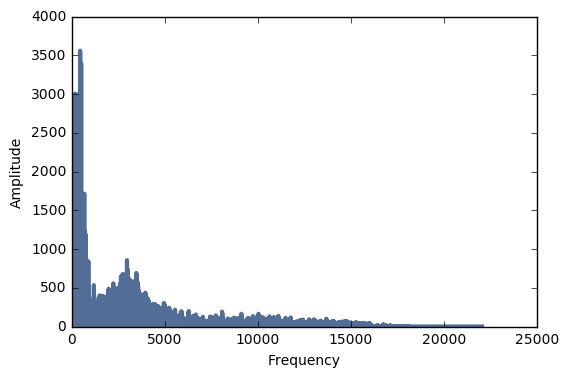

In [14]:
Metal_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Caught Somewhere In Time.wav')
Metal_2.normalize()
Metal_2_spectrum = Metal_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Metal_2_spectrum.plot()

In [ ]:
Metal_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Change In the House of Flies.wav')
Metal_3 = Metal_3.normalize()
Metal_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Countdown to Extinction.wav')
Metal_4 = Metal_4.normalize()
Metal_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Into the Pit.wav')
Metal_5 = Metal_5.normalize()
Metal_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Master Of Puppets.wav')
Metal_6 = Metal_6.normalize()
Metal_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Painkiller.wav')
Metal_7 = Metal_7.normalize()
Metal_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Run For The Hills.wav')
Metal_8 = Metal_8.normalize()
Metal_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/Shove It.wav')
Metal_9 = Metal_9.normalize()
Metal_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Metal/The 4 Horseman.wav')
Metal_10 = Metal_10.normalize()

### Oldies

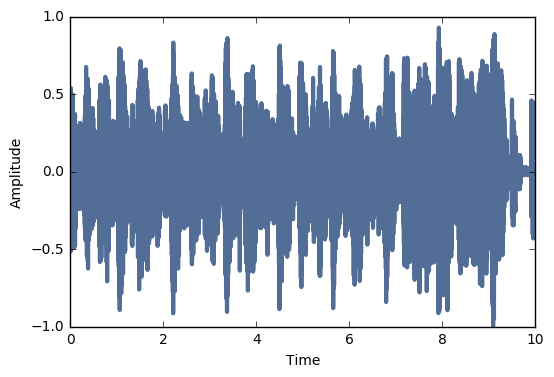

In [37]:
Oldies_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Candy Girl.wav')
Oldies_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Oldies_1.plot()

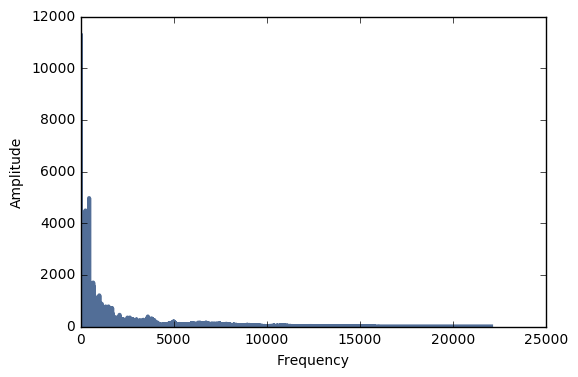

In [15]:
Oldies_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Dying to Live.wav')
Oldies_2.normalize()
Oldies_2_spectrum = Oldies_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Oldies_2_spectrum.plot()

In [ ]:
Oldies_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Johnny Be Good.wav')
Oldies_3 = Oldies_3.normalize()
Oldies_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/My Girl.wav')
Oldies_4 = Oldies_4.normalize()
Oldies_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Obladi, Oblada, Life Goes On.wav')
Oldies_5 = Oldies_5.normalize()
Oldies_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/The Twist.wav')
Oldies_6 = Oldies_6.normalize()
Oldies_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Turn Turn Turn.wav')
Oldies_7 = Oldies_7.normalize()
Oldies_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Pink Cadillac.wav')
Oldies_8 = Oldies_8.normalize()
Oldies_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Wipeout.wav')
Oldies_9 = Oldies_9.normalize()
Oldies_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Oldies/Youve Lost That Lovin Feelin.wav')
Oldies_10 = Oldies_10.normalize()


### Rap

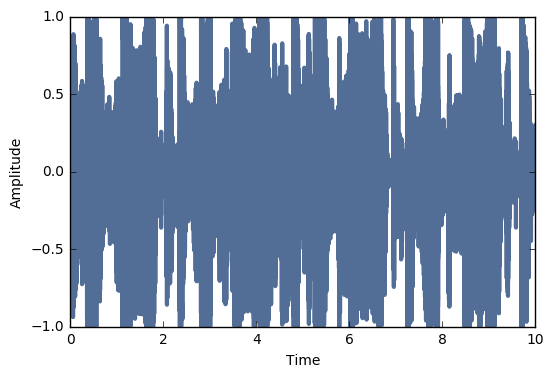

In [38]:
Rap_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Candy Shop.wav')
Rap_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Rap_1.plot()

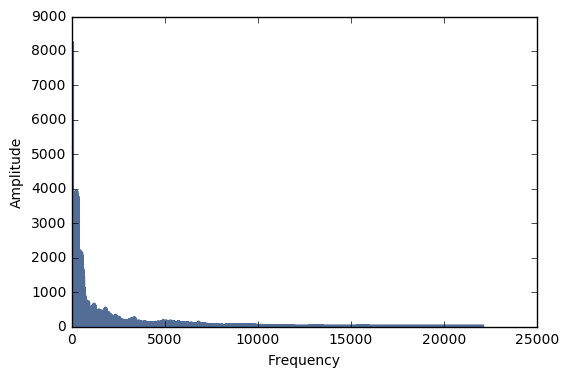

In [16]:
Rap_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Clint Eastwood.wav')
Rap_2.normalize()
Rap_2_spectrum = Rap_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Rap_2_spectrum.plot()

In [ ]:
Rap_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Get It Together.wav')
Rap_3 = Rap_3.normalize()
Rap_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Im Back.wav')
Rap_4 = Rap_4.normalize()
Rap_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Insane In The Brain.wav')
Rap_5 = Rap_5.normalize()
Rap_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Jane Fonda.wav')
Rap_6 = Rap_6.normalize()
Rap_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Sing For The Moment.wav')
Rap_7 = Rap_7.normalize()
Rap_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/Only God Can Judge Me.wav')
Rap_8 = Rap_8.normalize()
Rap_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/P.I.M.wav')
Rap_9 = Rap_9.normalize()
Rap_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rap/The Next Episode.wav')
Rap_10 = Rap_10.normalize()

### Reggae

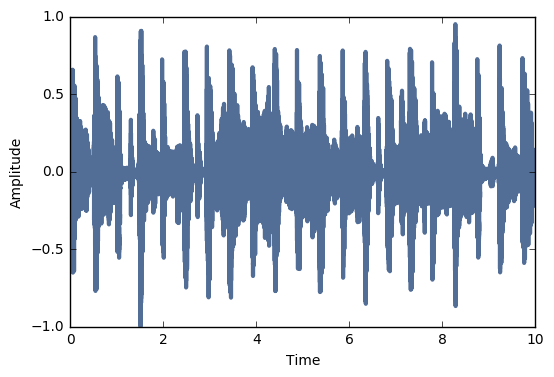

In [39]:
Reggae_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Buffalo Soldier.wav')
Reggae_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Reggae_1.plot()

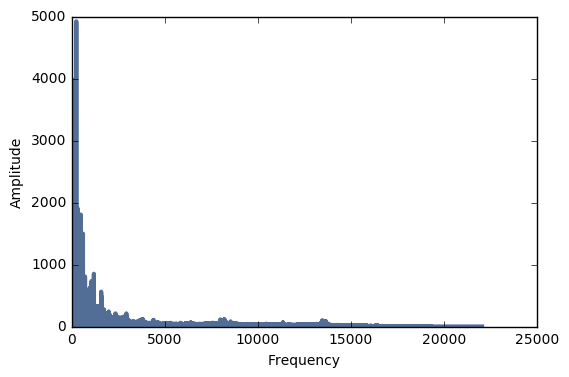

In [17]:
Reggae_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Easy Skanking.wav')
Reggae_2.normalize()
Reggae_2_spectrum = Reggae_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Reggae_2_spectrum.plot()

In [55]:
Reggae_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Is This Love.wav')
Reggae_3 = Reggae_3.normalize()
Reggae_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Kaya.wav')
Reggae_4 = Reggae_4.normalize()
Reggae_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/One Love.wav')
Reggae_5 = Reggae_5.normalize()
Reggae_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Keep On Moving.wav')
Reggae_6 = Reggae_6.normalize()
Reggae_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Kinky Reggae.wav')
Reggae_7 = Reggae_7.normalize()
Reggae_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/The Harder They Come.wav')
Reggae_8 = Reggae_8.normalize()
Reggae_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Running Away.wav')
Reggae_9 = Reggae_9.normalize()
Reggae_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Reggae/Lively Up Yourself.wav')
Reggae_10 = Reggae_10.normalize()

### Rock

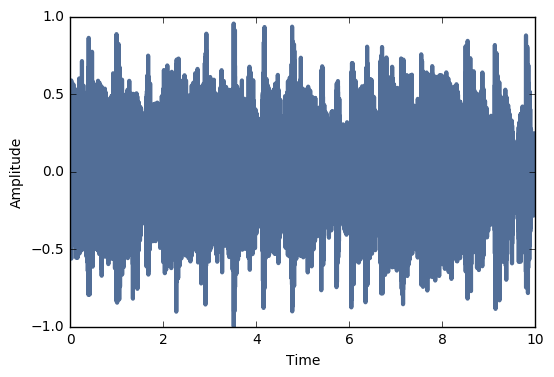

In [40]:
Rock_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Back In Black.wav')
Rock_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Rock_1.plot()

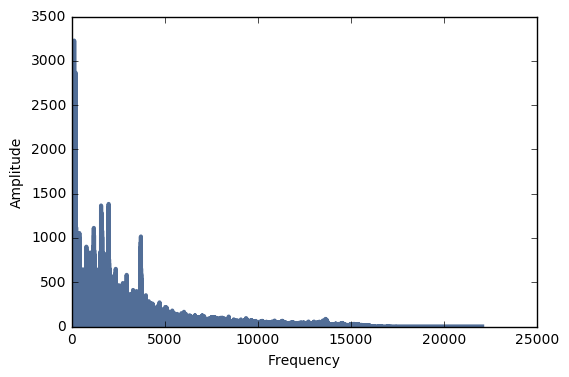

In [18]:
Rock_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Been Caught Stealing.wav')
Rock_2.normalize()
Rock_2_spectrum = Rock_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Rock_2_spectrum.plot()

In [ ]:
Rock_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Mother.wav')
Rock_3 = Rock_3.normalize()
Rock_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Paradise City.wav')
Rock_4 = Rock_4.normalize()
Rock_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Shook Me All Night Long.wav')
Rock_5 = Rock_5.normalize()
Rock_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Sink the Pink.wav')
Rock_6 = Rock_6.normalize()
Rock_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Sweet Child O Mine.wav')
Rock_7 = Rock_7.normalize()
Rock_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/This Cloud.wav')
Rock_8 = Rock_8.normalize()
Rock_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Thunderstruck.wav')
Rock_9 = Rock_9.normalize()
Rock_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Rock/Who Made Who.wav')
Rock_10 = Rock_10.normalize()

### Soul

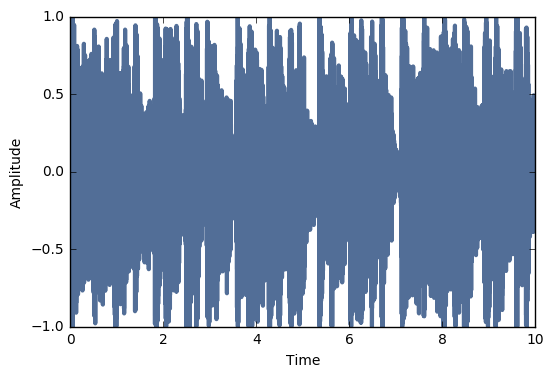

In [41]:
Soul_1 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Another Day.wav')
Soul_1.normalize()
plt.xlabel('Time')
plt.ylabel('Amplitude')
Soul_1.plot()

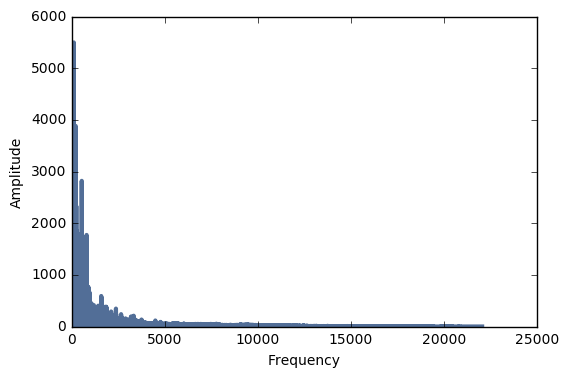

In [19]:
Soul_2 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Baby I Love You.wav')
Soul_2.normalize()
Soul_2_spectrum = Soul_2.make_spectrum()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
Soul_2_spectrum.plot()

In [ ]:
Soul_3 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Chain Of Fools.wav')
Soul_3 = Soul_3.normalize()
Soul_4 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Higher And Higher.wav')
Soul_4 = Soul_4.normalize()
Soul_5 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Killing Me Softly With His Song.wav')
Soul_5 = Soul_5.normalize()
Soul_6 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Oh Happy Days.wav')
Soul_6 = Soul_6.normalize()
Soul_7 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Another Saturday Night.wav')
Soul_7 = Soul_7.normalize()
Soul_8 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Respect.wav')
Soul_8 = Soul_8.normalize()
Soul_9 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Think Freedom.wav')
Soul_9 = Soul_9.normalize()
Soul_10 = thinkdsp.read_wave('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Music/Soul/Hard To Handle.wav')
Soul_10 = Soul_10.normalize()

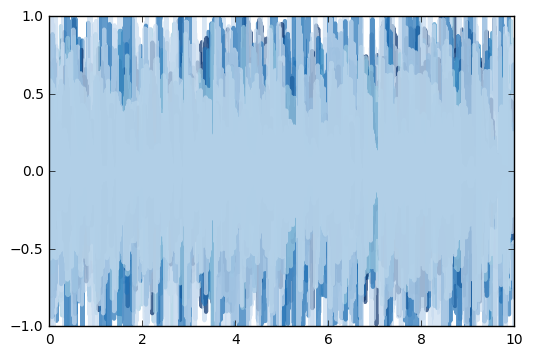

In [44]:
African_1.plot(c='red'),
Blues_1.plot(c='b'),
Classical_1.plot(c='y')
Country_1.plot(c='o')
Electronic_1.plot(c='w')
Folk_1.plot(c='p', label='folk')
Funk_1.plot(c='d')
Jazz_1.plot(c='a')
Latin_1.plot(c='c')
Metal_1.plot(c='e')
Oldies_1.plot(c='f')
Rap_1.plot(c='g')
Reggae_1.plot(c='h')
Rock_1.plot(c='i')
Soul_1.plot(c='m')

### Next Step: Let's create the Spectrograms

So, this series of functions will run a fourier transform of each snippet. The Fourier Transform takes a time-based pattern (our snippets), measures every possible cycle, and returns the overall cycle contents (the amplitude, offset (phase in radians), & rotation speed (frequency in Hertz) for every cycle that was found). The next function will scale the frequency axis logarithmically, and finally, we'll plot the spectrogram using matplotlib in the last function.